<a href="https://colab.research.google.com/github/sBx99/personal-data-analytics/blob/master/NetflixViewingHistory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

[Pandas Cheat Sheet](https://www.dataquest.io/blog/pandas-cheat-sheet/)

In [ ]:
import datetime as dt
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
sns.set()
%matplotlib inline

In [ ]:
# i mounted my google drive account on colab to do this
netflix = pd.read_csv('/content/drive/My Drive/NetflixViewingHistory (1).csv')

In [ ]:
netflix.shape

(2694, 2)

In [ ]:
netflix.head()

,Title,Date
0,Archer: Season 6: Vision Quest,19/07/20
1,Archer: Season 6: Edie's Wedding,19/07/20
2,Archer: Season 6: The Archer Sanction,19/07/20
3,Archer: Season 6: Three to Tango,19/07/20
4,Archer: Season 6: The Holdout,18/07/20


In [ ]:
first = netflix.tail(1)
print('the first netflix show i watched was', first)

the first netflix show i watched was                                      Title      Date
2693  Busted!: Season 1: Forewarned Murder  09/05/18


In [ ]:
last = netflix.head(1)
print('the last netflix show i watched was', last)

the last netflix show i watched was                             Title      Date
0  Archer: Season 6: Vision Quest  19/07/20


In [ ]:
netflix['Date'].head()

0    19/07/20
1    19/07/20
2    19/07/20
3    19/07/20
4    18/07/20
Name: Date, dtype: object

[Source](https://github.com/rckclimber/analysing-netflix-viewing-history/blob/master/netflix_history.ipynb)

In [ ]:
# convert object to datetime type
netflix['Date'] = pd.to_datetime(netflix['Date'], errors='coerce')
netflix['Date'].head()

0   2020-07-19
1   2020-07-19
2   2020-07-19
3   2020-07-19
4   2020-07-18
Name: Date, dtype: datetime64[ns]

In [ ]:
# separate day, month and year
netflix['day'] = netflix['Date'].dt.day
netflix['month'] = netflix['Date'].dt.month_name()
netflix['year'] = netflix['Date'].dt.year
netflix['dayOfWeek'] = netflix['Date'].dt.day_name()

In [ ]:
showDetails = netflix.Title.str.split(":", expand=True, n=2)

# show's details
netflix['showName'] = showDetails[0]
netflix['season'] = showDetails[1]
netflix['episodeName'] = showDetails[2]

In [ ]:
# if the season column is "None" them it is most likely a movie, lets add another column to our dataframe 
netflix['genre'] = netflix.apply(lambda x:'Movie' if pd.isnull(x['season']) else 'TV Show' , axis=1)
netflix.head()

,Title,Date,day,month,year,dayOfWeek,showName,season,episodeName,genre
0,Archer: Season 6: Vision Quest,2020-07-19,19,July,2020,Sunday,Archer,Season 6,Vision Quest,TV Show
1,Archer: Season 6: Edie's Wedding,2020-07-19,19,July,2020,Sunday,Archer,Season 6,Edie's Wedding,TV Show
2,Archer: Season 6: The Archer Sanction,2020-07-19,19,July,2020,Sunday,Archer,Season 6,The Archer Sanction,TV Show
3,Archer: Season 6: Three to Tango,2020-07-19,19,July,2020,Sunday,Archer,Season 6,Three to Tango,TV Show
4,Archer: Season 6: The Holdout,2020-07-18,18,July,2020,Saturday,Archer,Season 6,The Holdout,TV Show


In [ ]:
netflix.tail()

,Title,Date,day,month,year,dayOfWeek,showName,season,episodeName,genre
2689,Food Wars!: Shokugeki no Soma: The Meat Invader,2018-05-16,16,May,2018,Wednesday,Food Wars!,Shokugeki no Soma,The Meat Invader,TV Show
2690,Food Wars!: Shokugeki no Soma: The Ice Queen a...,2018-05-16,16,May,2018,Wednesday,Food Wars!,Shokugeki no Soma,The Ice Queen and the Spring Storm,TV Show
2691,Food Wars!: Shokugeki no Soma: That Chef Never...,2018-10-05,5,October,2018,Friday,Food Wars!,Shokugeki no Soma,That Chef Never Smiles,TV Show
2692,Food Wars!: Shokugeki no Soma: God Tongue,2018-10-05,5,October,2018,Friday,Food Wars!,Shokugeki no Soma,God Tongue,TV Show
2693,Busted!: Season 1: Forewarned Murder,2018-09-05,5,September,2018,Wednesday,Busted!,Season 1,Forewarned Murder,TV Show


In [ ]:
# save this!!!
netflix.to_csv('/content/drive/My Drive/CleanedNetflixViewingHistory.csv')

In [ ]:
current_palette = sns.dark_palette("red", reverse=True)

In [ ]:
# stylize graphs
sns.set_style('ticks')
sns.set_palette(current_palette)
matplotlib.rcParams['font.size'] = 20
matplotlib.rcParams['figure.figsize'] = (15, 8)

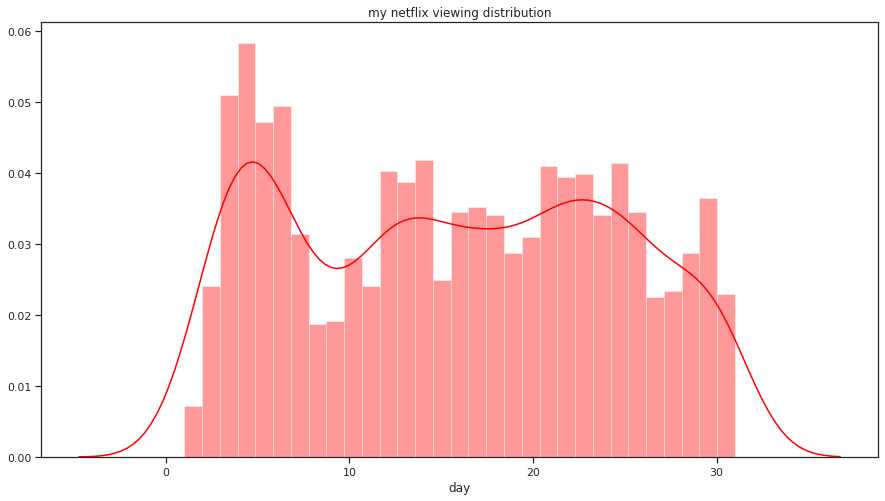

In [ ]:
# day of month --- monthly viewing distribution
plt.title('my netflix viewing distribution')
ax = sns.distplot(netflix['day'], bins=31, hist=True)
plt.show(ax)

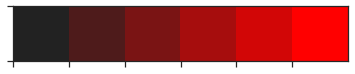

In [ ]:
sns.palplot(sns.dark_palette("red"))

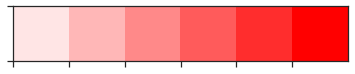

In [ ]:
sns.palplot(sns.light_palette("red"))

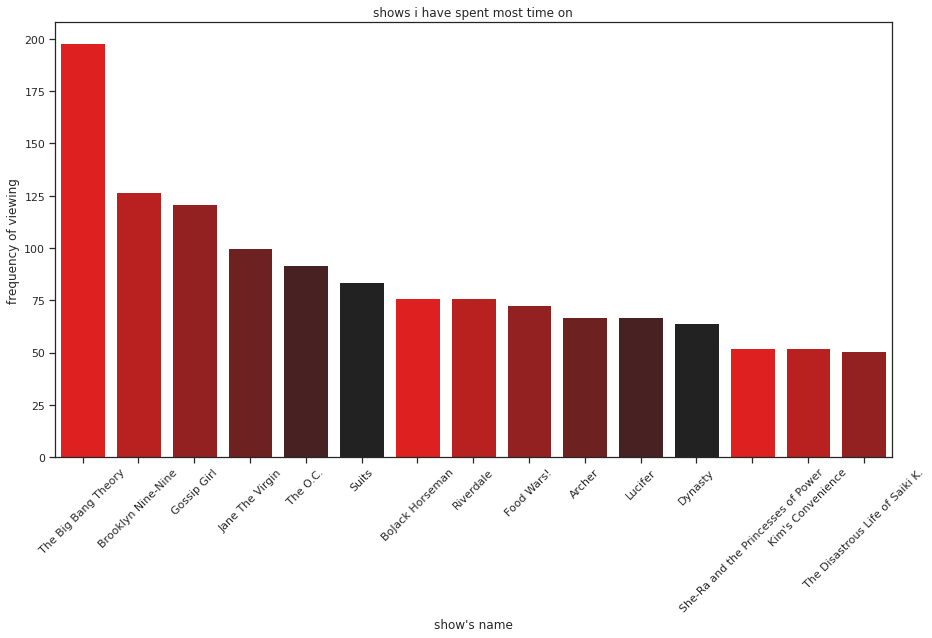

In [ ]:
# most watched shows

plt.title('shows i have spent most time on')
ax = sns.barplot(x=netflix['showName'].sort_values(ascending=True).value_counts().index[:15],
                 y=netflix['showName'].sort_values(ascending=True).value_counts()[:15],
                 palette=current_palette)
plt.xlabel("show's name")
plt.ylabel("frequency of viewing")
loc, labels = plt.xticks()
ax.set_xticklabels(labels, rotation=45)
plt.show(ax)

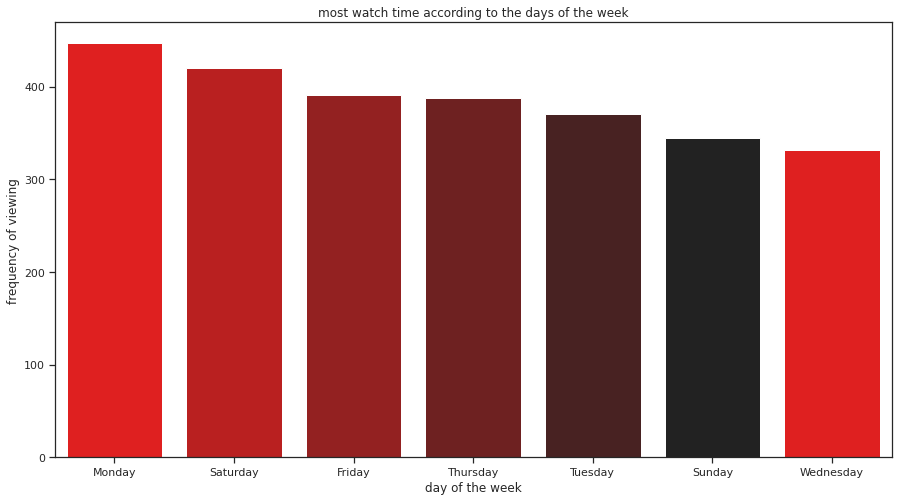

In [ ]:
# watch time vs week of the day

plt.title("most watch time according to the days of the week")
ax = sns.barplot(x=netflix["dayOfWeek"].value_counts().index,
                 y=netflix["dayOfWeek"].value_counts(),
                 palette=current_palette)
plt.xlabel("day of the week")
plt.ylabel("frequency of viewing")
plt.show(ax)

In [ ]:
byYear = netflix.groupby('month')['year'].value_counts().sort_values(ascending=False).reset_index(name='frequency')
byYear

,month,year,frequency
0,April,2020,199
1,June,2020,151
2,March,2019,143
3,March,2020,136
4,May,2020,132
5,December,2019,126
6,May,2018,121
7,October,2019,120
8,September,2019,111
9,January,2020,109


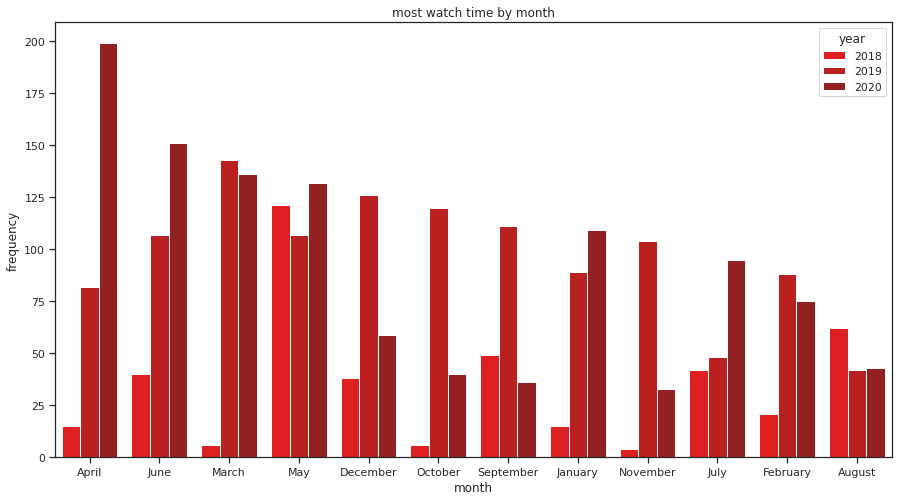

In [ ]:
# most viewing time by month
plt.title("most watch time by month")
ax = sns.barplot(x=byYear["month"], y=byYear["frequency"], hue=byYear["year"], palette=current_palette)

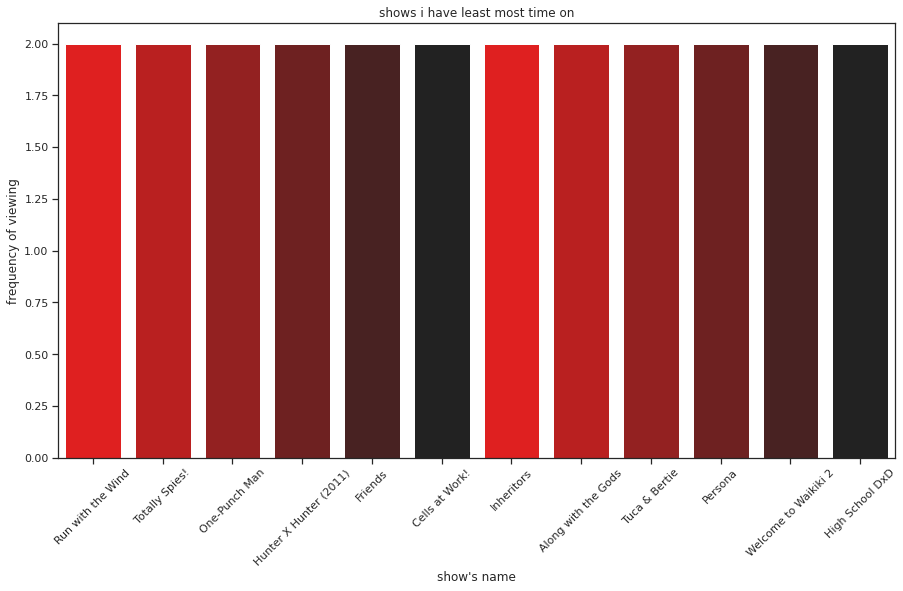

In [ ]:
# shows i gave a second chance
plt.title('shows i have least most time on')
ax = sns.barplot(x=netflix['showName'].sort_values(ascending=False).value_counts().index[-113:99],
                 y=netflix['showName'].sort_values(ascending=False).value_counts()[-113:99],
                 palette=current_palette)
plt.xlabel("show's name")
plt.ylabel("frequency of viewing")
loc, labels = plt.xticks()
ax.set_xticklabels(labels, rotation=45)
plt.show(ax)

In [ ]:
netflix['showName'].count()

2694

In [ ]:
# keeping check
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2694 entries, 0 to 2693
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Title        2694 non-null   object        
 1   Date         2694 non-null   datetime64[ns]
 2   day          2694 non-null   int64         
 3   month        2694 non-null   object        
 4   year         2694 non-null   int64         
 5   dayOfWeek    2694 non-null   object        
 6   showName     2694 non-null   object        
 7   season       2644 non-null   object        
 8   episodeName  2574 non-null   object        
 9   genre        2694 non-null   object        
dtypes: datetime64[ns](1), int64(2), object(7)
memory usage: 210.6+ KB


In [ ]:
# co-variance
netflix.cov()

,day,year
day,76.551469,-1.412101
year,-1.412101,0.501591


In [ ]:
# correlation
netflix.corr()

,day,year
day,1.000000,-0.227884
year,-0.227884,1.000000


In [ ]:
# show names
netflix['showName'].value_counts(dropna=True) 
# there are 200 unique shows

The Big Bang Theory        198
Brooklyn Nine-Nine         127
Gossip Girl                121
Jane The Virgin            100
The O.C.                    92
                          ... 
Kiki’s Delivery Service      1
Oh, Ramona!                  1
Spirited Away                1
Sixteen Candles              1
He is psychometric           1
Name: showName, Length: 200, dtype: int64

In [ ]:
# top 10% shows
netflix['showName'].value_counts(dropna=True).head(20)

The Big Bang Theory                   198
Brooklyn Nine-Nine                    127
Gossip Girl                           121
Jane The Virgin                       100
The O.C.                               92
Suits                                  84
Riverdale                              76
BoJack Horseman                        76
Food Wars!                             73
Lucifer                                67
Archer                                 67
Dynasty                                64
Kim's Convenience                      52
She-Ra and the Princesses of Power     52
The Disastrous Life of Saiki K.        51
Skins                                  51
Assassination Classroom                43
Rick and Morty                         41
Degrassi                               40
My Hero Academia                       39
Name: showName, dtype: int64

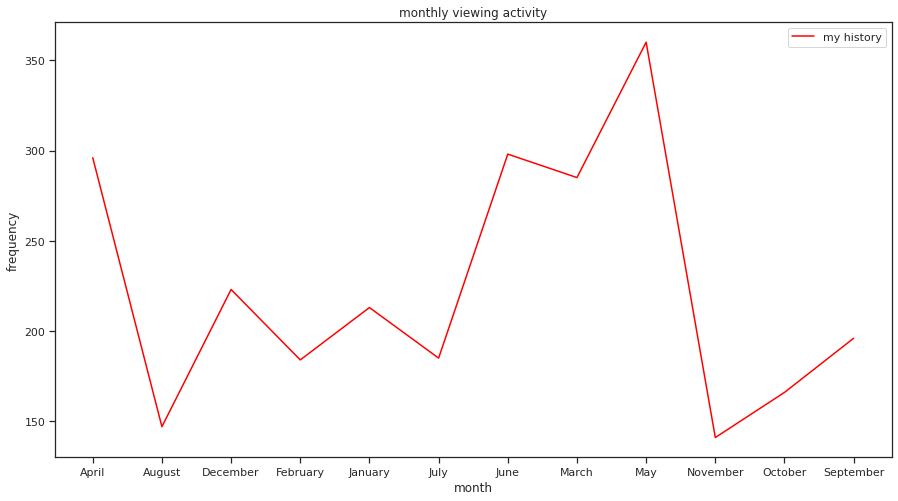

In [ ]:
# monthly viewing activity
plt.title("monthly viewing activity")
ax = sns.lineplot(x=netflix["month"].value_counts().index,
                  y=netflix["month"].value_counts(),
                  palette=current_palette,
                  label="my history")
plt.xlabel("month")
plt.ylabel("frequency")
plt.show(ax)

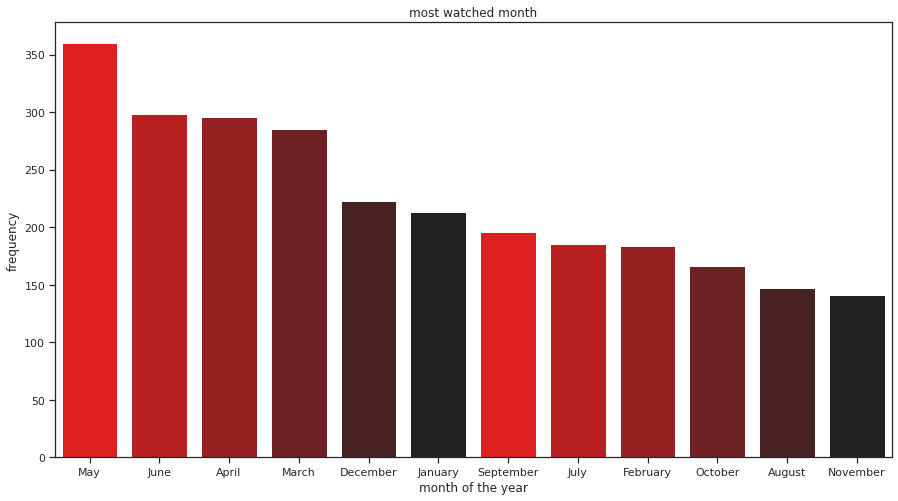

In [ ]:
ax = sns.barplot(x=netflix["month"].value_counts().index,
                 y=netflix["month"].value_counts(),
                 palette=current_palette)
plt.title("most watched month")
plt.xlabel("month of the year")
plt.ylabel("frequency")
plt.show(ax)

[Netflix Usage Stats - API](https://github.com/hmartos/netflix-usage-stats)